<a href="https://colab.research.google.com/github/KORALLLL/summer_practice/blob/main/bagging/Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

список аугментаций:
- поворот
- зеркаливание чисел 0,8
- шифтирование на пару пикселей
- сжатие и растяжение

In [3]:
import torch
import torchvision.datasets
import torchvision.transforms
import matplotlib.pyplot as plt
import random


mnist_test = torchvision.datasets.MNIST('./', download = True, train = False)

100%|██████████| 9912422/9912422 [00:00<00:00, 141943132.37it/s]


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 59908849.57it/s]


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 38025519.71it/s]


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 9989789.60it/s]


Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



In [128]:
indexes = []
for i in range(10000):
  if mnist_test.targets[i] == 0 or mnist_test.targets[i] == 8:
    indexes.append(i)

In [45]:
rotater = torchvision.transforms.RandomRotation(degrees = (-15, 15))
h_flipper = torchvision.transforms.RandomHorizontalFlip(p=1) #only for 08
v_flipper = torchvision.transforms.RandomVerticalFlip(p=1) #only for 08
shifter = torchvision.transforms.RandomAffine(0, translate = (2/28,2/28))
compressor = torchvision.transforms.RandomAffine(0, scale = (0.8, 0.9))
stratcher = torchvision.transforms.RandomAffine(0, scale = (1.05, 1.1))

In [42]:
def augmentation(old_image, seed):
  seed1 = random.randint(0, 3)
  if label == 0 or label == 8:
    if seed1 == 0:
      image = old_image
    elif seed1 == 1:
      image = h_flipper(old_image)
    elif seed1 == 2:
      image = v_flipper(old_image)
    else:
      image = h_flipper(v_flipper(old_image))
  else:
    image = old_image

  if seed == 0: #rot
    new_image = rotater(image)
  elif seed == 1: #shift
    new_image = shifter(image)
  elif seed == 2: #comp
    new_image = compressor(image)
  elif seed == 3: #str
    new_image = stratcher(image)
  elif seed == 4: #rot+shift
    new_image = rotater(shifter(image))
  elif seed == 5: #rot+comp
    new_image = rotater(compressor(image))
  elif seed == 6: #rot+str
    new_image = rotater(stratcher(image))
  elif seed == 7: #shift+comp
    new_image = shifter(compressor(image))
  elif seed == 8: #shift+stretch
    new_image = shifter(stratcher(image))
  elif seed == 9: #rot+shift+comp
    new_image = rotater(shifter(compressor(image)))
  elif seed == 10: #tor+shift+stretch
    new_image = rotater(shifter(stratcher(image)))

  return(new_image)

0


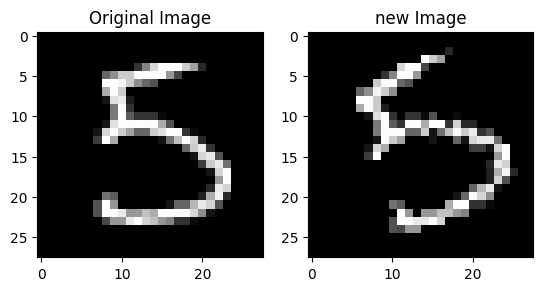

In [24]:
index = 15
image, label = mnist_test[index]
new_image = augmentation(image, 0)
fig, axs = plt.subplots(1, 2)
axs[0].imshow(image, cmap='gray')
axs[0].set_title('Original Image')
axs[1].imshow(new_image, cmap='gray')
axs[1].set_title('new Image')
plt.show()

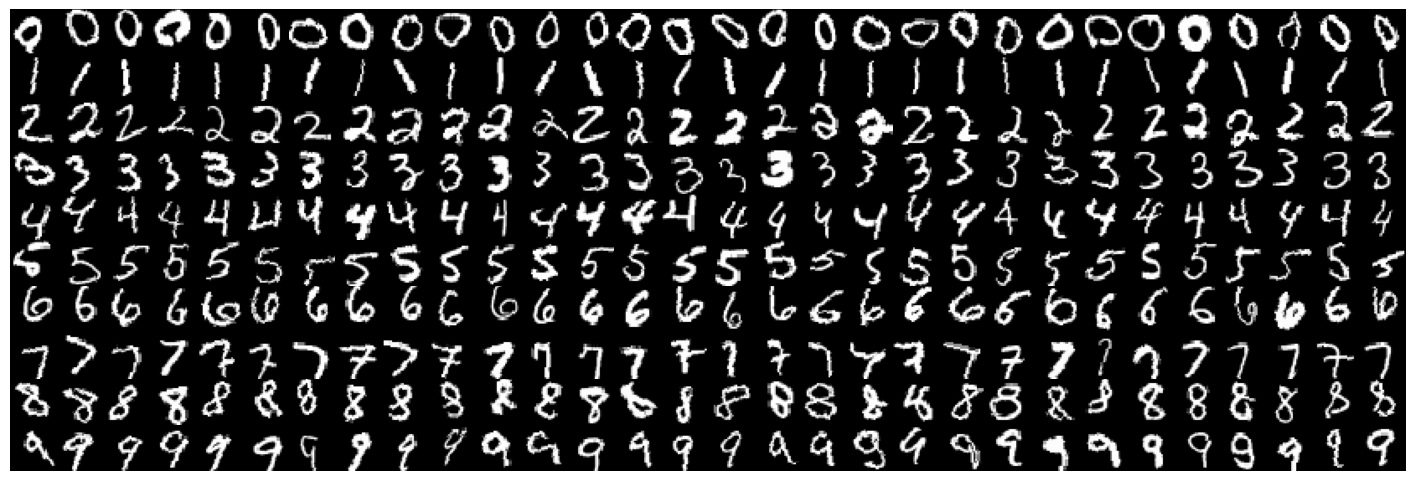

In [54]:
count = 0
plt.figure(figsize=(18, 6))
for digit in range(10):
  count = 0
  for i in range(len(mnist_test)):
      image, label = mnist_test[i]
      if label == digit:
          plt.subplot(10, 30, digit*30+count+1)
          plt.imshow(augmentation(image, 10), cmap='gray')
          plt.axis('off')
          count += 1
      if count == 30:
          break

plt.subplots_adjust(wspace=0, hspace=0)
plt.show()